In [51]:
import pandas as pd
from pathlib import Path
import pybedtools
from pybedtools import BedTool

import matplotlib.pyplot as plt
import seaborn as sns
pybedtools.set_tempdir("/storage/home/nmc6088/scratch")

In [6]:
chromosome_map = {
        "ce11": {
            "I": "NC_003279.8",	
            "II": "NC_003280.10",
            "III": "NC_003281.10",
            "IV": "NC_003282.8",
            "V": "NC_003283.11",
            "X": "NC_003284.9",
            "M": "NC_001328.1"
        },
        "sacCer3": {
                "I": "NC_001133.9",
                "II": "NC_001134.8",	
                "III": "NC_001135.5",		
                "IV": "NC_001136.10",	
                "V": "NC_001137.3",
                "VI": "NC_001138.5",	
                "VII": "NC_001139.9",		
                "VIII": "NC_001140.6",	
                "IX": "NC_001141.2",	
                "X": "NC_001142.9",
                "XI": "NC_001143.9",
                "XII": "NC_001144.5",	
                "XIII": "NC_001145.3",	
                "XIV": "NC_001146.8",	
                "XV": "NC_001147.6",	
                "XVI": "NC_001148.4",	
                "M": "NC_001224.1",
        },
    "chm13v2.0": {
            "1": 'NC_060925.1',
            "2": 'NC_060926.1',	
            "3": 'NC_060927.1',
            "4": 'NC_060928.1',
            "5": 'NC_060929.1',
            "6": 'NC_060930.1',
            "7": 'NC_060931.1',
            "8": 'NC_060932.1',
            "9": 'NC_060933.1',	
            "10": 'NC_060934.1',	
            "11": 'NC_060935.1',	
            "12": 'NC_060936.1',		
            "13": 'NC_060937.1',	
            "14": 'NC_060938.1',
            "15": 'NC_060939.1',		
            "16": 'NC_060940.1',		
            "17": 'NC_060941.1',	
            "18": 'NC_060942.1',	
            "19": 'NC_060943.1',	
            "20": 'NC_060944.1',	
            "21": 'NC_060945.1',	
            "22": 'NC_060946.1',	
            "X": 'NC_060947.1',
            "Y": 'NC_060948.1'
    }
}

In [7]:
# !agat_convert_sp_gxf2gxf.pl -g /storage/home/nmc6088/scratch/galGal6.ncbiRefSeq.gtf.gz -o /storage/home/nmc6088/scratch/galGal6.ncbiRefSeq.gff3

In [8]:
# !agat_convert_sp_gxf2gxf.pl -g /storage/home/nmc6088/scratch/danRer11.ncbiRefSeq.gtf.gz -o /storage/home/nmc6088/scratch/danRer11.ncbiRefSeq.gff3

In [9]:
# !agat_convert_sp_gxf2gxf.pl -g /storage/home/nmc6088/scratch/dm6.ncbiRefSeq.gtf.gz -o /storage/home/nmc6088/scratch/dm6.ncbiRefSeq.gff3

In [52]:
gff_files = {"_".join(f.name.split("_")[:2]): f for f in Path("/storage/group/izg5139/default/DNA-Avoidmers").glob("*.gff.gz")} | \
            {
             "galGal6": "/storage/home/nmc6088/scratch/galGal6.ncbiRefSeq.gff3",
             "danRer11": "/storage/home/nmc6088/scratch/danRer11.ncbiRefSeq.gff3",
             "dm6": "/storage/home/nmc6088/scratch/dm6.ncbiRefSeq.gff3"
            }
gff_files

{'GCF_000002985.6': PosixPath('/storage/group/izg5139/default/DNA-Avoidmers/GCF_000002985.6_WBcel235_genomic.gff.gz'),
 'GCF_000008865.2': PosixPath('/storage/group/izg5139/default/DNA-Avoidmers/GCF_000008865.2_ASM886v2_genomic.gff.gz'),
 'GCF_000013425.1': PosixPath('/storage/group/izg5139/default/DNA-Avoidmers/GCF_000013425.1_ASM1342v1_genomic.gff.gz'),
 'GCF_000146045.2': PosixPath('/storage/group/izg5139/default/DNA-Avoidmers/GCF_000146045.2_R64_genomic.gff.gz'),
 'GCF_000240185.1': PosixPath('/storage/group/izg5139/default/DNA-Avoidmers/GCF_000240185.1_ASM24018v2_genomic.gff.gz'),
 'GCF_009914755.1': PosixPath('/storage/group/izg5139/default/DNA-Avoidmers/GCF_009914755.1_T2T-CHM13v2.0_genomic.gff.gz'),
 'galGal6': '/storage/home/nmc6088/scratch/galGal6.ncbiRefSeq.gff3',
 'danRer11': '/storage/home/nmc6088/scratch/danRer11.ncbiRefSeq.gff3',
 'dm6': '/storage/home/nmc6088/scratch/dm6.ncbiRefSeq.gff3'}

In [12]:
import subprocess

for path in ["/storage/home/nmc6088/scratch/galGal6.ncbiRefSeq.gff3"]:
        
    command = f"python /storage/group/izg5139/default/nicole/mindi/coverage/gff_clean.py --gff {path} --add_exons 1 --destination /storage/home/nmc6088/scratch/merged_gff --tempdir /storage/home/nmc6088/scratch"
    print(command)
    subprocess.run(command,
                check=True,
                shell=True
                )

python /storage/group/izg5139/default/nicole/mindi/coverage/gff_clean.py --gff /storage/home/nmc6088/scratch/galGal6.ncbiRefSeq.gff3 --add_exons 1 --destination /storage/home/nmc6088/scratch/merged_gff --tempdir /storage/home/nmc6088/scratch


Traceback (most recent call last):
  File "/storage/group/izg5139/default/nicole/mindi/coverage/gff_clean.py", line 288, in <module>
    gff_df = cleaner.read(gff, add_exons=add_exons)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/storage/group/izg5139/default/nicole/mindi/coverage/gff_clean.py", line 152, in read
    subprocess.run(
  File "/storage/group/izg5139/default/nicole/miniconda3/lib/python3.11/subprocess.py", line 550, in run
    stdout, stderr = process.communicate(input, timeout=timeout)
                     ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/storage/group/izg5139/default/nicole/miniconda3/lib/python3.11/subprocess.py", line 1201, in communicate
    self.wait()
  File "/storage/group/izg5139/default/nicole/miniconda3/lib/python3.11/subprocess.py", line 1264, in wait
    return self._wait(timeout=timeout)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/storage/group/izg5139/default/nicole/miniconda3/lib/python3.11/subprocess.py", line 2046, 

In [13]:
gff_files = {"_".join(f.name.split("_")[:2]) if "GC" in f.name else f.name.split(".")[0]: f for f in Path("/storage/home/nmc6088/scratch/merged_gff").glob("*.gff")}
gff_files

{'GCF_000240185.1': PosixPath('/storage/home/nmc6088/scratch/merged_gff/GCF_000240185.1_ASM24018v2_genomic.merged.gff'),
 'GCF_000013425.1': PosixPath('/storage/home/nmc6088/scratch/merged_gff/GCF_000013425.1_ASM1342v1_genomic.merged.gff'),
 'danRer11': PosixPath('/storage/home/nmc6088/scratch/merged_gff/danRer11.ncbiRefSeq.merged.gff'),
 'galGal6': PosixPath('/storage/home/nmc6088/scratch/merged_gff/galGal6.ncbiRefSeq.merged.gff'),
 'GCF_000008865.2': PosixPath('/storage/home/nmc6088/scratch/merged_gff/GCF_000008865.2_ASM886v2_genomic.merged.gff'),
 'dm6': PosixPath('/storage/home/nmc6088/scratch/merged_gff/dm6.ncbiRefSeq.merged.gff'),
 'GCF_000146045.2': PosixPath('/storage/home/nmc6088/scratch/merged_gff/GCF_000146045.2_R64_genomic.merged.gff'),
 'GCF_009914755.1': PosixPath('/storage/home/nmc6088/scratch/merged_gff/GCF_009914755.1_T2T-CHM13v2.0_genomic.merged.gff'),
 'GCF_000002985.6': PosixPath('/storage/home/nmc6088/scratch/merged_gff/GCF_000002985.6_WBcel235_genomic.merged.gff')

In [58]:
organism_names_all

{'GCF_000002985.6': 'C. elegans',
 'GCF_000146045.2': 'S. cerevisiae',
 'GCF_009914755.1': 'H. sapiens',
 'dm6': 'D. melanogaster',
 'galGal6': 'G. gallus',
 'danRer11': 'D. rerio',
 'GCF_000013425.1': 'S. aureus',
 'GCF_000240185.1': 'K. pneumoniae',
 'GCF_000008865.2': 'E. coli'}

In [14]:
model_organisms = [f for f in Path("/storage/group/izg5139/default/DNA-Avoidmers/patterns/pattern_merged_abacaba").glob("*.extended.maximal.txt")]
model_organisms

[PosixPath('/storage/group/izg5139/default/DNA-Avoidmers/patterns/pattern_merged_abacaba/GCF_000008865.2_ASM886v2_genomic_abacaba_words_length_50.extended.maximal.txt'),
 PosixPath('/storage/group/izg5139/default/DNA-Avoidmers/patterns/pattern_merged_abacaba/GCF_000013425.1_ASM1342v1_genomic_abacaba_words_length_50.extended.maximal.txt'),
 PosixPath('/storage/group/izg5139/default/DNA-Avoidmers/patterns/pattern_merged_abacaba/GCF_000240185.1_ASM24018v2_genomic_abacaba_words_length_50.extended.maximal.txt'),
 PosixPath('/storage/group/izg5139/default/DNA-Avoidmers/patterns/pattern_merged_abacaba/ce11_abacaba_words_length_50.extended.maximal.txt'),
 PosixPath('/storage/group/izg5139/default/DNA-Avoidmers/patterns/pattern_merged_abacaba/chm13v2.0.shuffled_abacaba_words_length_50.extended.maximal.txt'),
 PosixPath('/storage/group/izg5139/default/DNA-Avoidmers/patterns/pattern_merged_abacaba/chm13v2.0_abacaba_words_length_50.extended.maximal.txt'),
 PosixPath('/storage/group/izg5139/default

# Total Density

In [59]:
!zcat /storage/group/izg5139/default/DNA-Avoidmers/GCF_000008865.2_ASM886v2_genomic.gff.gz > /storage/home/nmc6088/scratch/GCF_000008865.2_ASM886v2_genomic.gff

In [62]:
!zcat /storage/group/izg5139/default/DNA-Avoidmers/GCF_000240185.1_ASM24018v2_genomic.gff.gz > /storage/home/nmc6088/scratch/GCF_000240185.1_ASM24018v2_genomic.gff

In [65]:
!zcat /storage/group/izg5139/default/DNA-Avoidmers/GCF_000013425.1_ASM1342v1_genomic.gff.gz > /storage/home/nmc6088/scratch/GCF_000013425.1_ASM1342v1_genomic.gff

In [60]:
!mkdir /storage/home/nmc6088/scratch/gff_with_exons

In [69]:
# !agat_convert_sp_gxf2gxf.pl -g /storage/home/nmc6088/scratch/GCF_000013425.1_ASM1342v1_genomic.gff -o /storage/home/nmc6088/scratch/gff_with_exons/GCF_000013425.1_ASM1342v1_genomic.with_exons.gff

In [66]:
# !agat_convert_sp_gxf2gxf.pl -g /storage/home/nmc6088/scratch/GCF_000240185.1_ASM24018v2_genomic.gff -o /storage/home/nmc6088/scratch/gff_with_exons/GCF_000240185.1_ASM24018v2_genomic.with_exons.gff

In [64]:
# !agat_convert_sp_gxf2gxf.pl -g /storage/home/nmc6088/scratch/GCF_000008865.2_ASM886v2_genomic.gff -o /storage/home/nmc6088/scratch/gff_with_exons/GCF_000008865.2_ASM886v2_genomic.with_exons.gff

In [71]:
gff_files = {"_".join(f.name.split("_")[:2]): f for f in Path("/storage/group/izg5139/default/DNA-Avoidmers").glob("*.gff.gz")} | \
            {
             "galGal6": "/storage/home/nmc6088/scratch/galGal6.ncbiRefSeq.gff3",
             "danRer11": "/storage/home/nmc6088/scratch/danRer11.ncbiRefSeq.gff3",
             "dm6": "/storage/home/nmc6088/scratch/dm6.ncbiRefSeq.gff3"
            }
gff_files

{'GCF_000002985.6': PosixPath('/storage/group/izg5139/default/DNA-Avoidmers/GCF_000002985.6_WBcel235_genomic.gff.gz'),
 'GCF_000008865.2': PosixPath('/storage/group/izg5139/default/DNA-Avoidmers/GCF_000008865.2_ASM886v2_genomic.gff.gz'),
 'GCF_000013425.1': PosixPath('/storage/group/izg5139/default/DNA-Avoidmers/GCF_000013425.1_ASM1342v1_genomic.gff.gz'),
 'GCF_000146045.2': PosixPath('/storage/group/izg5139/default/DNA-Avoidmers/GCF_000146045.2_R64_genomic.gff.gz'),
 'GCF_000240185.1': PosixPath('/storage/group/izg5139/default/DNA-Avoidmers/GCF_000240185.1_ASM24018v2_genomic.gff.gz'),
 'GCF_009914755.1': PosixPath('/storage/group/izg5139/default/DNA-Avoidmers/GCF_009914755.1_T2T-CHM13v2.0_genomic.gff.gz'),
 'galGal6': '/storage/home/nmc6088/scratch/galGal6.ncbiRefSeq.gff3',
 'danRer11': '/storage/home/nmc6088/scratch/danRer11.ncbiRefSeq.gff3',
 'dm6': '/storage/home/nmc6088/scratch/dm6.ncbiRefSeq.gff3'}

In [72]:
gff_with_exons = {"_".join(f.name.split("_")[:2]): f for f in Path("/storage/home/nmc6088/scratch/gff_with_exons").glob("*.with_exons.gff")}
gff_with_exons

{'GCF_000240185.1': PosixPath('/storage/home/nmc6088/scratch/gff_with_exons/GCF_000240185.1_ASM24018v2_genomic.with_exons.gff'),
 'GCF_000013425.1': PosixPath('/storage/home/nmc6088/scratch/gff_with_exons/GCF_000013425.1_ASM1342v1_genomic.with_exons.gff'),
 'GCF_000008865.2': PosixPath('/storage/home/nmc6088/scratch/gff_with_exons/GCF_000008865.2_ASM886v2_genomic.with_exons.gff')}

In [73]:
for key, path in gff_with_exons.items():
    gff_files.update({key: path})

In [75]:
organism_names_all

{'GCF_000002985.6': 'C. elegans',
 'GCF_000146045.2': 'S. cerevisiae',
 'GCF_009914755.1': 'H. sapiens',
 'dm6': 'D. melanogaster',
 'galGal6': 'G. gallus',
 'danRer11': 'D. rerio',
 'GCF_000013425.1': 'S. aureus',
 'GCF_000240185.1': 'K. pneumoniae',
 'GCF_000008865.2': 'E. coli'}

In [74]:
gff_files

{'GCF_000002985.6': PosixPath('/storage/group/izg5139/default/DNA-Avoidmers/GCF_000002985.6_WBcel235_genomic.gff.gz'),
 'GCF_000008865.2': PosixPath('/storage/home/nmc6088/scratch/gff_with_exons/GCF_000008865.2_ASM886v2_genomic.with_exons.gff'),
 'GCF_000013425.1': PosixPath('/storage/home/nmc6088/scratch/gff_with_exons/GCF_000013425.1_ASM1342v1_genomic.with_exons.gff'),
 'GCF_000146045.2': PosixPath('/storage/group/izg5139/default/DNA-Avoidmers/GCF_000146045.2_R64_genomic.gff.gz'),
 'GCF_000240185.1': PosixPath('/storage/home/nmc6088/scratch/gff_with_exons/GCF_000240185.1_ASM24018v2_genomic.with_exons.gff'),
 'GCF_009914755.1': PosixPath('/storage/group/izg5139/default/DNA-Avoidmers/GCF_009914755.1_T2T-CHM13v2.0_genomic.gff.gz'),
 'galGal6': '/storage/home/nmc6088/scratch/galGal6.ncbiRefSeq.gff3',
 'danRer11': '/storage/home/nmc6088/scratch/danRer11.ncbiRefSeq.gff3',
 'dm6': '/storage/home/nmc6088/scratch/dm6.ncbiRefSeq.gff3'}

In [76]:
genome_sizes = pd.read_table("/storage/group/izg5139/default/DNA-Avoidmers/scripts/genome_sizes.txt", header=None, names=["organism", "genome_size"])
genome_sizes

,organism,genome_size
0,GCF_000008865.2,5594605
1,GCF_000013425.1,2821361
2,GCF_000240185.1,5682322
3,ce11,100286401
4,chm13v2.0,3117292070
5,chm13v2.0.shuffled,3117292070
6,danRer11,1679203469
7,dm6,143726002
8,galGal6,1065365425
9,sacCer3,12157105


In [77]:
def extract_name(organism):
    organism = organism.name
    if "GC" in organism:
        return "_".join(organism.split("_")[:2])

    return organism.split("_")[0]

In [17]:
from tqdm import tqdm

df_all = []
for organism in tqdm(model_organisms):
    organism_name = extract_name(organism)
    df = pd.read_table(
                       BedTool.from_dataframe(pd.read_csv(organism, usecols=["seqID", "start", "end"])).sort().merge().fn,
                       header=None,
                       names=["seqID", "start", "end"]
                      )
    df.loc[:, "organism"] = organism_name
    df_all.append(df)

df_all = pd.concat(df_all, axis=0)\
            .merge(
                   genome_sizes,
                   on="organism",
                   how="left"
                  )
df_all

100%|██████████| 10/10 [01:05<00:00,  6.54s/it]


,seqID,start,end,organism,genome_size
0,NC_002127.1,811,861,GCF_000008865.2,5594605
1,NC_002127.1,2640,2690,GCF_000008865.2,5594605
2,NC_002127.1,2833,2884,GCF_000008865.2,5594605
3,NC_002127.1,2975,3028,GCF_000008865.2,5594605
4,NC_002128.1,209,262,GCF_000008865.2,5594605
...,...,...,...,...,...
14083625,chrXVI,945110,945162,sacCer3,12157105
14083626,chrXVI,945304,945361,sacCer3,12157105
14083627,chrXVI,945461,945529,sacCer3,12157105
14083628,chrXVI,947397,947460,sacCer3,12157105


In [19]:
def map_y(y):
    if not y["seqID"].startswith("chr"):
        return y["seqID"]
        
    if y['organism'] in chromosome_map:

        chromosome = y['seqID'].split("hr")[1]

        if chromosome.endswith("M"):
            chromosome = chromosome + "T"
            
        mapped = chromosome_map[y['organism']][chromosome]
        return mapped
    return y["seqID"]

In [20]:
df_all = df_all[df_all["seqID"] != 'chrM']

In [21]:
df_all["seqID"] = df_all[["seqID", "organism"]].apply(lambda y: map_y(y), axis=1)

/storage/home/nmc6088/scratch/ipykernel_1073513/1593766857.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all["seqID"] = df_all[["seqID", "organism"]].apply(lambda y: map_y(y), axis=1)


In [22]:
df_all.head()

,seqID,start,end,organism,genome_size
0,NC_002127.1,811,861,GCF_000008865.2,5594605
1,NC_002127.1,2640,2690,GCF_000008865.2,5594605
2,NC_002127.1,2833,2884,GCF_000008865.2,5594605
3,NC_002127.1,2975,3028,GCF_000008865.2,5594605
4,NC_002128.1,209,262,GCF_000008865.2,5594605


In [23]:
df_all["organism"].unique()

array(['GCF_000008865.2', 'GCF_000013425.1', 'GCF_000240185.1', 'ce11',
       'chm13v2.0.shuffled', 'chm13v2.0', 'danRer11', 'dm6', 'galGal6',
       'sacCer3'], dtype=object)

In [24]:
df_all.loc[:, "avoidmerLength"] = df_all["end"] - df_all["start"]

/storage/home/nmc6088/scratch/ipykernel_1073513/4184505231.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all.loc[:, "avoidmerLength"] = df_all["end"] - df_all["start"]


In [27]:
density_genomes = [df_all.groupby("organism").agg({"avoidmerLength": "sum", 
                                "genome_size": "first"
                               })\
                .assign(density=lambda ds: 1e6 * ds['avoidmerLength'].div(ds['genome_size']))

,avoidmerLength,genome_size,density
organism,,,
GCF_000008865.2,1012092,5594605,180904.996868
GCF_000013425.1,214737,2821361,76111.139269
GCF_000240185.1,791047,5682322,139211.927800
ce11,7079703,100286401,70594.845656
chm13v2.0,203701864,3117292070,65345.774289
chm13v2.0.shuffled,493841989,3117292070,158420.185825
danRer11,95318505,1679203469,56764.118679
dm6,14921662,143726002,103820.198102
galGal6,44602136,1065365425,41865.574904


# Genomic Compartments

In [78]:
organism_names = {
                  "ce11": "GCF_000002985.6",
                  "sacCer3": "GCF_000146045.2",
                  "chm13v2.0": "GCF_009914755.1"
                 }

In [39]:
intersections = []

for i, organism in enumerate(model_organisms):
    if "shuffled" in organism.name:
        continue
        
    df = pd.read_csv(organism)

    if organism.name.startswith("chm13v2"):
        df = df[df["seqID"] != "chrM"]
        
    organism_name = extract_name(organism)
    print(organism_name)

    if organism_name in organism_names:
        df["seqID"] = df["seqID"].apply(lambda y: chromosome_map[organism_name][y.split("chr")[1]])
        
    df = df[df["length"] >= 70]
    print(df.shape[0])
    print(organism)

    df_bed = BedTool.from_dataframe(df[["seqID", "start", "end"]])

    if organism_name in organism_names:
        organism_name = organism_names[organism_name]
    print(organism_name)

    if organism_name not in gff_files:
        continue
    
    gff_file = gff_files[organism_name]
    gff_bed = BedTool.from_dataframe(pd.read_table(gff_file))
    
    interf = pd.read_table(
                    df_bed.intersect(gff_bed, wao=True).fn,
                    header=None,
                    names=["seqID", "start", "end", "chromosome", "compStart", "compEnd", "total", "source", "compartment", "biotype", "overlap"]
        )
    intersections.append(interf)
    
intersections = pd.concat(intersections, axis=0)
intersections

GCF_000008865.2
833
/storage/group/izg5139/default/DNA-Avoidmers/patterns/pattern_merged_abacaba/GCF_000008865.2_ASM886v2_genomic_abacaba_words_length_50.extended.maximal.txt
GCF_000008865.2
GCF_000013425.1
97
/storage/group/izg5139/default/DNA-Avoidmers/patterns/pattern_merged_abacaba/GCF_000013425.1_ASM1342v1_genomic_abacaba_words_length_50.extended.maximal.txt
GCF_000013425.1
GCF_000240185.1
479
/storage/group/izg5139/default/DNA-Avoidmers/patterns/pattern_merged_abacaba/GCF_000240185.1_ASM24018v2_genomic_abacaba_words_length_50.extended.maximal.txt
GCF_000240185.1
ce11
3282
/storage/group/izg5139/default/DNA-Avoidmers/patterns/pattern_merged_abacaba/ce11_abacaba_words_length_50.extended.maximal.txt
GCF_000002985.6
chm13v2.0
70545
/storage/group/izg5139/default/DNA-Avoidmers/patterns/pattern_merged_abacaba/chm13v2.0_abacaba_words_length_50.extended.maximal.txt
GCF_009914755.1


/storage/home/nmc6088/scratch/ipykernel_1073513/1306277707.py:34: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interf = pd.read_table(


danRer11
31829
/storage/group/izg5139/default/DNA-Avoidmers/patterns/pattern_merged_abacaba/danRer11_abacaba_words_length_50.extended.maximal.txt
danRer11
dm6
9766
/storage/group/izg5139/default/DNA-Avoidmers/patterns/pattern_merged_abacaba/dm6_abacaba_words_length_50.extended.maximal.txt
dm6
galGal6
14877
/storage/group/izg5139/default/DNA-Avoidmers/patterns/pattern_merged_abacaba/galGal6_abacaba_words_length_50.extended.maximal.txt
galGal6
sacCer3
901
/storage/group/izg5139/default/DNA-Avoidmers/patterns/pattern_merged_abacaba/sacCer3_abacaba_words_length_50.extended.maximal.txt
GCF_000146045.2


,seqID,start,end,chromosome,compStart,compEnd,total,source,compartment,biotype,overlap
0,NC_002128.1,2234,2308,NC_002128.1,0,92721,2,RefSeq,region,.,74
1,NC_002128.1,9869,9944,NC_002128.1,9192,11110,3,RefSeq,CDS,.,75
2,NC_002128.1,9869,9944,NC_002128.1,9192,11110,3,AGAT,exon,.,75
3,NC_002128.1,9869,9944,NC_002128.1,9192,11110,3,RefSeq,gene,.,75
4,NC_002128.1,9869,9944,NC_002128.1,9192,11110,3,RefSeq,gene,protein_coding,75
...,...,...,...,...,...,...,...,...,...,...,...
4132,NC_001148.4,940328,940401,NC_001148.4,939921,941136,1,RefSeq,CDS,.,73
4133,NC_001148.4,940328,940401,NC_001148.4,939921,941136,1,RefSeq,exon,.,73
4134,NC_001148.4,940328,940401,NC_001148.4,939921,941136,1,RefSeq,gene,.,73
4135,NC_001148.4,940328,940401,NC_001148.4,939921,941136,1,RefSeq,gene,protein_coding,73


In [55]:
gff_files

{'GCF_000002985.6': PosixPath('/storage/group/izg5139/default/DNA-Avoidmers/GCF_000002985.6_WBcel235_genomic.gff.gz'),
 'GCF_000008865.2': PosixPath('/storage/group/izg5139/default/DNA-Avoidmers/GCF_000008865.2_ASM886v2_genomic.gff.gz'),
 'GCF_000013425.1': PosixPath('/storage/group/izg5139/default/DNA-Avoidmers/GCF_000013425.1_ASM1342v1_genomic.gff.gz'),
 'GCF_000146045.2': PosixPath('/storage/group/izg5139/default/DNA-Avoidmers/GCF_000146045.2_R64_genomic.gff.gz'),
 'GCF_000240185.1': PosixPath('/storage/group/izg5139/default/DNA-Avoidmers/GCF_000240185.1_ASM24018v2_genomic.gff.gz'),
 'GCF_009914755.1': PosixPath('/storage/group/izg5139/default/DNA-Avoidmers/GCF_009914755.1_T2T-CHM13v2.0_genomic.gff.gz'),
 'galGal6': '/storage/home/nmc6088/scratch/galGal6.ncbiRefSeq.gff3',
 'danRer11': '/storage/home/nmc6088/scratch/danRer11.ncbiRefSeq.gff3',
 'dm6': '/storage/home/nmc6088/scratch/dm6.ncbiRefSeq.gff3'}

In [42]:
coverage_df = []

for organism in model_organisms:
    if "shuffled" in organism.name:
        continue
        
    df = pd.read_csv(organism)

    if organism.name.startswith("chm13v2"):
        df = df[df["seqID"] != "chrM"]
        
    organism_name = extract_name(organism)
    print(organism_name)

    if organism_name in organism_names:
        df["seqID"] = df["seqID"].apply(lambda y: chromosome_map[organism_name][y.split("chr")[1]])
        
    df = df[df["length"] >= 70]
    print(df.shape[0])
    print(organism)
    df_bed = BedTool.from_dataframe(df[["seqID", "start", "end"]])

    if organism_name in organism_names:
        organism_name = organism_names[organism_name]

    gff_file = gff_files[organism_name]
    gff_bed = BedTool.from_dataframe(pd.read_table(gff_file))
    
    covf = pd.read_table(
                    gff_bed.coverage(df_bed).fn,
                    header=None,
                    names=["seqID", "start", "end", "compartmentCounts", "source", "compartment", "biotype", "totalHits", "overlappingBp", "compartmentLength", "coverage"],
        )\
                .query("biotype == '.'")
    
    # .groupby("compartment", as_index=False)\
    #            .agg({"overlappingBp": "sum",
    #                  "compartmentLength": "sum"
    #                 })\
    #            .assign(density=lambda ds: 1e2 * ds["overlappingBp"].div(ds["compartmentLength"]))
    covf.loc[:, "organism"] = organism_name
    coverage_df.append(covf)
    
coverage_df = pd.concat(coverage_df, axis=0)
coverage_df

GCF_000008865.2
833
/storage/group/izg5139/default/DNA-Avoidmers/patterns/pattern_merged_abacaba/GCF_000008865.2_ASM886v2_genomic_abacaba_words_length_50.extended.maximal.txt
GCF_000013425.1
97
/storage/group/izg5139/default/DNA-Avoidmers/patterns/pattern_merged_abacaba/GCF_000013425.1_ASM1342v1_genomic_abacaba_words_length_50.extended.maximal.txt
GCF_000240185.1
479
/storage/group/izg5139/default/DNA-Avoidmers/patterns/pattern_merged_abacaba/GCF_000240185.1_ASM24018v2_genomic_abacaba_words_length_50.extended.maximal.txt
ce11
3282
/storage/group/izg5139/default/DNA-Avoidmers/patterns/pattern_merged_abacaba/ce11_abacaba_words_length_50.extended.maximal.txt
chm13v2.0
70545
/storage/group/izg5139/default/DNA-Avoidmers/patterns/pattern_merged_abacaba/chm13v2.0_abacaba_words_length_50.extended.maximal.txt
danRer11
31829
/storage/group/izg5139/default/DNA-Avoidmers/patterns/pattern_merged_abacaba/danRer11_abacaba_words_length_50.extended.maximal.txt
dm6
9766
/storage/group/izg5139/default/DN

,seqID,start,end,compartmentCounts,source,compartment,biotype,totalHits,overlappingBp,compartmentLength,coverage,organism
0,NC_002127.1,412,736,1,RefSeq,CDS,.,0,0,324,0.0,GCF_000008865.2
1,NC_002127.1,412,736,1,AGAT,exon,.,0,0,324,0.0,GCF_000008865.2
2,NC_002127.1,412,736,1,RefSeq,gene,.,0,0,324,0.0,GCF_000008865.2
4,NC_002127.1,970,2388,2,RefSeq,CDS,.,0,0,1418,0.0,GCF_000008865.2
5,NC_002127.1,970,2388,2,AGAT,exon,.,0,0,1418,0.0,GCF_000008865.2
...,...,...,...,...,...,...,...,...,...,...,...,...
25373,NC_001224.1,79212,80022,1,RefSeq,gene,.,0,0,810,0.0,GCF_000146045.2
25375,NC_001224.1,85034,85112,1,RefSeq,exon,.,0,0,78,0.0,GCF_000146045.2
25376,NC_001224.1,85034,85112,1,RefSeq,gene,.,0,0,78,0.0,GCF_000146045.2
25378,NC_001224.1,85294,85777,1,RefSeq,exon,.,0,0,483,0.0,GCF_000146045.2


In [43]:
organism_names_all = {
                   'GCF_000002985.6': 'C. elegans',
                   'GCF_000146045.2': 'S. cerevisiae',
                   'GCF_009914755.1': 'H. sapiens',
                   'dm6': 'D. melanogaster',
                    'galGal6': 'G. gallus',
                    'danRer11': 'D. rerio',
                    'GCF_000013425.1': 'S. aureus',
                    'GCF_000240185.1': 'K. pneumoniae',
                    'GCF_000008865.2': 'E. coli'
                  }

coverage_df["organism_name"] = coverage_df["organism"].apply(lambda y: organism_names_all[y])

In [44]:
genome_sizes = pd.read_table("/storage/group/izg5139/default/DNA-Avoidmers/scripts/genome_sizes.txt", header=None,
                            names=["organism", "genome_size"])
genome_sizes

,organism,genome_size
0,GCF_000008865.2,5594605
1,GCF_000013425.1,2821361
2,GCF_000240185.1,5682322
3,ce11,100286401
4,chm13v2.0,3117292070
5,chm13v2.0.shuffled,3117292070
6,danRer11,1679203469
7,dm6,143726002
8,galGal6,1065365425
9,sacCer3,12157105


In [45]:
organism_names_p = {v: k for k, v in organism_names.items()}
organism_names_p

{'GCF_000002985.6': 'ce11',
 'GCF_000146045.2': 'sacCer3',
 'GCF_009914755.1': 'chm13v2.0'}

In [46]:
coverage_df

,seqID,start,end,compartmentCounts,source,compartment,biotype,totalHits,overlappingBp,compartmentLength,coverage,organism,organism_name
0,NC_002127.1,412,736,1,RefSeq,CDS,.,0,0,324,0.0,GCF_000008865.2,E. coli
1,NC_002127.1,412,736,1,AGAT,exon,.,0,0,324,0.0,GCF_000008865.2,E. coli
2,NC_002127.1,412,736,1,RefSeq,gene,.,0,0,324,0.0,GCF_000008865.2,E. coli
4,NC_002127.1,970,2388,2,RefSeq,CDS,.,0,0,1418,0.0,GCF_000008865.2,E. coli
5,NC_002127.1,970,2388,2,AGAT,exon,.,0,0,1418,0.0,GCF_000008865.2,E. coli
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25373,NC_001224.1,79212,80022,1,RefSeq,gene,.,0,0,810,0.0,GCF_000146045.2,S. cerevisiae
25375,NC_001224.1,85034,85112,1,RefSeq,exon,.,0,0,78,0.0,GCF_000146045.2,S. cerevisiae
25376,NC_001224.1,85034,85112,1,RefSeq,gene,.,0,0,78,0.0,GCF_000146045.2,S. cerevisiae
25378,NC_001224.1,85294,85777,1,RefSeq,exon,.,0,0,483,0.0,GCF_000146045.2,S. cerevisiae


In [ ]:
coverage_df.loc[:, "organism_"] = coverage_df["organism"].map(organism_names_p)

In [38]:
coverage_df.merge(
                  genome_sizes, 
                  how="left", 
                  right_on="organism", 
                  left_on="organism_"
                 )

,compartment,overlappingBp,compartmentLength,density,organism_x,organism_name,organism_,organism_y,genome_size
0,CDS,44744,4737961,0.944372,GCF_000008865.2,E. coli,NaN,NaN,NaN
1,Exon,46260,4778323,0.968122,GCF_000008865.2,E. coli,NaN,NaN,NaN
2,Gene,46260,4778324,0.968122,GCF_000008865.2,E. coli,NaN,NaN,NaN
3,Genome,50990,5591299,0.911953,GCF_000008865.2,E. coli,NaN,NaN,NaN
4,CDS,4649,2346472,0.198127,GCF_000013425.1,S. aureus,NaN,NaN,NaN
5,Exon,5753,2374106,0.242323,GCF_000013425.1,S. aureus,NaN,NaN,NaN
6,Gene,5753,2373956,0.242338,GCF_000013425.1,S. aureus,NaN,NaN,NaN
7,CDS,26387,4990059,0.528791,GCF_000240185.1,K. pneumoniae,NaN,NaN,NaN
8,Exon,26974,5031716,0.536080,GCF_000240185.1,K. pneumoniae,NaN,NaN,NaN
9,Gene,26974,5031716,0.536080,GCF_000240185.1,K. pneumoniae,NaN,NaN,NaN


In [36]:
coverage_df["compartment"] = coverage_df["compartment"].replace("region", "Genome")\
                                                       .replace("exon", "Exon")\
                                                        .replace("gene", "Gene")

coverage_df = coverage_df.merge()
coverage_df = coverage_df[coverage_df["compartment"].isin({"Genome", "Exon", "Gene"})]
coverage_df

TypeError: DataFrame.merge() missing 1 required positional argument: 'right'

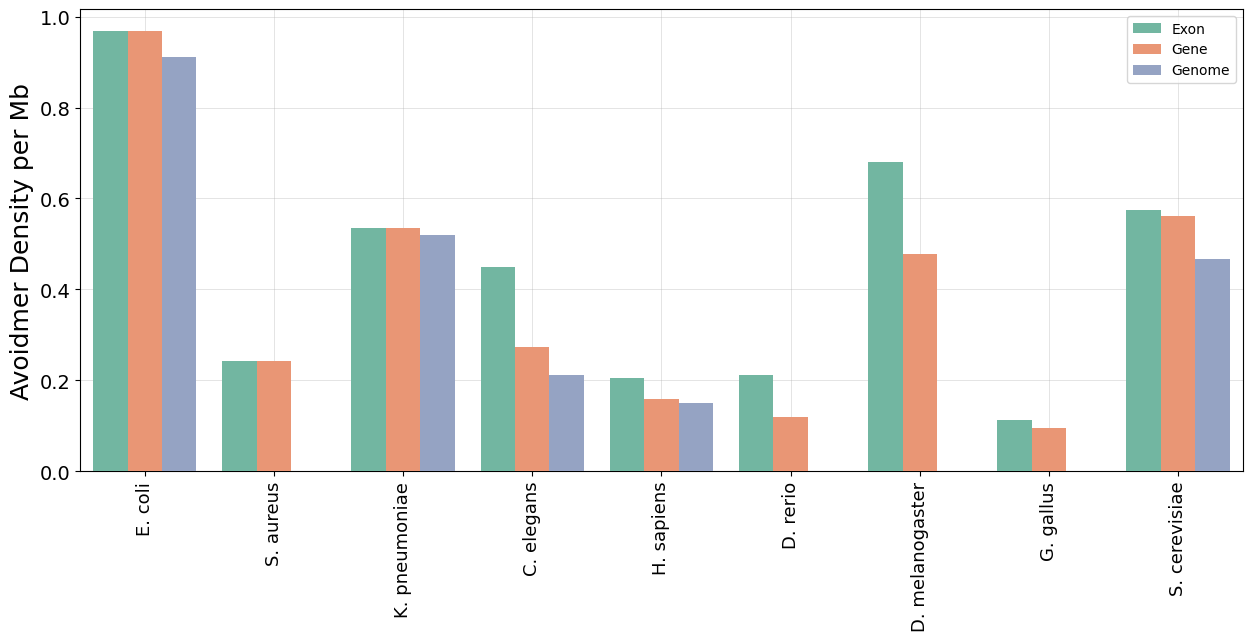

In [79]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))

sns.barplot(data=coverage_df, 
            x="organism_name",
            y="density",
            dodge=True,
            width=0.8,
            hue="compartment",
            palette="Set2",
            ax=ax,
           zorder=3,
           #order=coverage_df[coverage_df['compartment'] == 'Genome'].groupby("organism_name").agg({"density": "mean"}).index.tolist()
           )
ax.grid(lw=0.4, alpha=0.6, zorder=0)
ax.tick_params(axis="y", labelsize=14)
ax.tick_params(axis="x", labelsize=13, rotation=90)
ax.legend(loc=0, title="")
ax.set_ylabel("Avoidmer Density per Mb")
ax.set_xlabel("")
ax.yaxis.label.set_size(18)

4125
/storage/group/izg5139/default/DNA-Avoidmers/patterns/pattern_merged_abacaba/GCF_000008865.2_ASM886v2_genomic_abacaba_words_length_50.all_seqs.txt
  compartment  totalHits  overlappingBp  compartmentLength   density  \
0         CDS       3746          44744            4737961  0.944372   
1        exon        229           1516              40362  3.756008   
2        gene       3975          46260            4778324  0.968122   
3      region       4125          50990            5594605  0.911414   

   countDensity  
0    790.635465  
1   5673.653436  
2    831.881639  
3    737.317469  


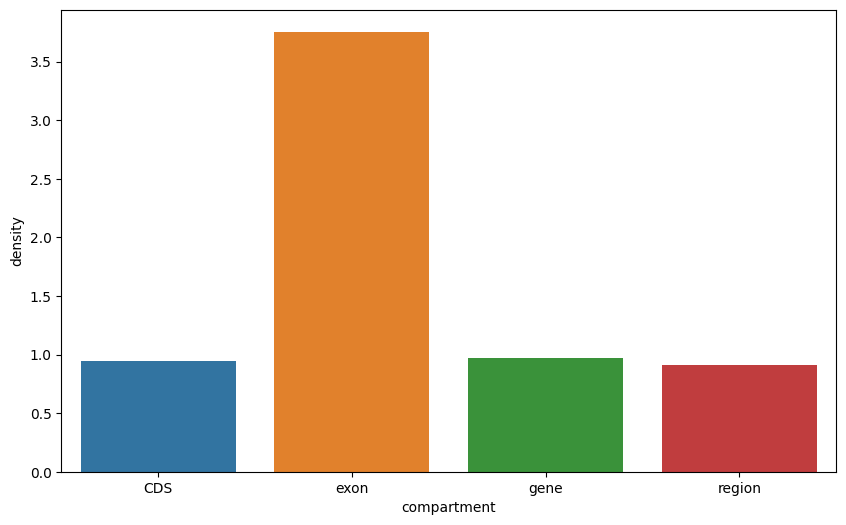

373
/storage/group/izg5139/default/DNA-Avoidmers/patterns/pattern_merged_abacaba/GCF_000013425.1_ASM1342v1_genomic_abacaba_words_length_50.all_seqs.txt
  compartment  totalHits  overlappingBp  compartmentLength   density  \
0         CDS        324           4649            2346472  0.198127   
1        exon         66           1104              27795  3.971937   
2        gene        390           5753            2374073  0.242326   
3      region        373           6122            2821361  0.216987   

   countDensity  
0    138.079636  
1   2374.527793  
2    164.274645  
3    132.205698  


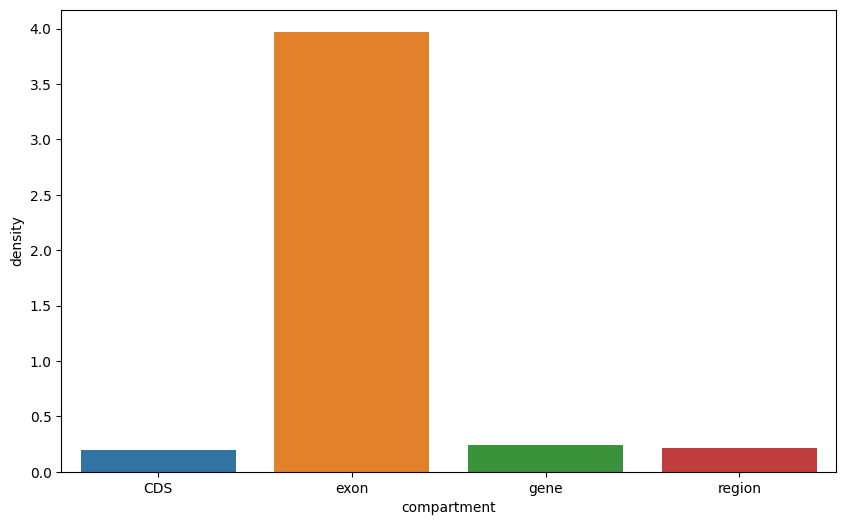

2251
/storage/group/izg5139/default/DNA-Avoidmers/patterns/pattern_merged_abacaba/GCF_000240185.1_ASM24018v2_genomic_abacaba_words_length_50.all_seqs.txt
  compartment  totalHits  overlappingBp  compartmentLength   density  \
0         CDS       2075          26387            4990059  0.528791   
1        exon         80            587              41661  1.408992   
2        gene       2155          26974            5031716  0.536080   
3      region       2251          30474            5682322  0.536295   

   countDensity  
0    415.826747  
1   1920.261156  
2    428.283313  
3    396.140873  


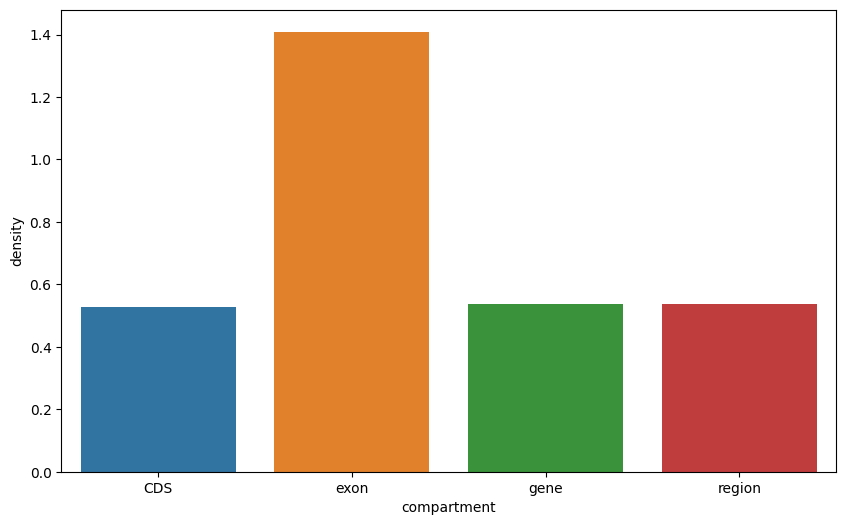

15296
/storage/group/izg5139/default/DNA-Avoidmers/patterns/pattern_merged_abacaba/ce11_abacaba_words_length_50.all_seqs.txt


***** WARNING: File /storage/home/nmc6088/scratch/pybedtools.exwjzz6j.tmp has inconsistent naming convention for record:
NC_001328.1	0	13794	1	region

***** WARNING: File /storage/home/nmc6088/scratch/pybedtools.exwjzz6j.tmp has inconsistent naming convention for record:
NC_001328.1	0	13794	1	region



  compartment  totalHits  overlappingBp  compartmentLength  density  \
0         CDS          0              0           26729260      0.0   
1        exon          0              0           32672924      0.0   
2        gene          0              0           63193611      0.0   
3      region          0              0          100286401      0.0   

   countDensity  
0           0.0  
1           0.0  
2           0.0  
3           0.0  


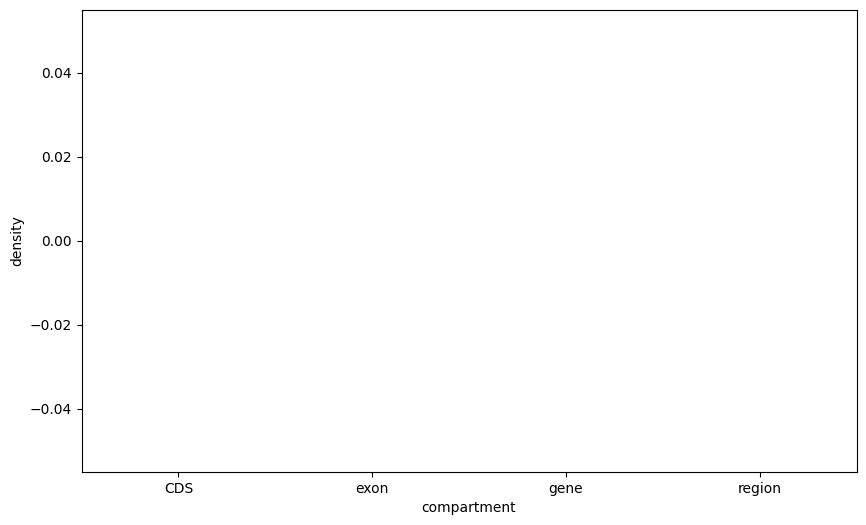

1574165
/storage/group/izg5139/default/DNA-Avoidmers/patterns/pattern_merged_abacaba/chm13v2.0.shuffled_abacaba_words_length_50.all_seqs.txt
297886
/storage/group/izg5139/default/DNA-Avoidmers/patterns/pattern_merged_abacaba/chm13v2.0_abacaba_words_length_50.all_seqs.txt
135823
/storage/group/izg5139/default/DNA-Avoidmers/patterns/pattern_merged_abacaba/danRer11_abacaba_words_length_50.all_seqs.txt
47207
/storage/group/izg5139/default/DNA-Avoidmers/patterns/pattern_merged_abacaba/dm6_abacaba_words_length_50.all_seqs.txt
63394
/storage/group/izg5139/default/DNA-Avoidmers/patterns/pattern_merged_abacaba/galGal6_abacaba_words_length_50.all_seqs.txt
4361
/storage/group/izg5139/default/DNA-Avoidmers/patterns/pattern_merged_abacaba/sacCer3_abacaba_words_length_50.all_seqs.txt
  compartment  totalHits  overlappingBp  compartmentLength  density  \
0         CDS          0              0            8753175      0.0   
1        exon          0              0            8838016      0.0   
2     

***** WARNING: File /storage/home/nmc6088/scratch/pybedtools.2jfoz3zc.tmp has inconsistent naming convention for record:
NC_001133.9	0	230218	1	region

***** WARNING: File /storage/home/nmc6088/scratch/pybedtools.2jfoz3zc.tmp has inconsistent naming convention for record:
NC_001133.9	0	230218	1	region



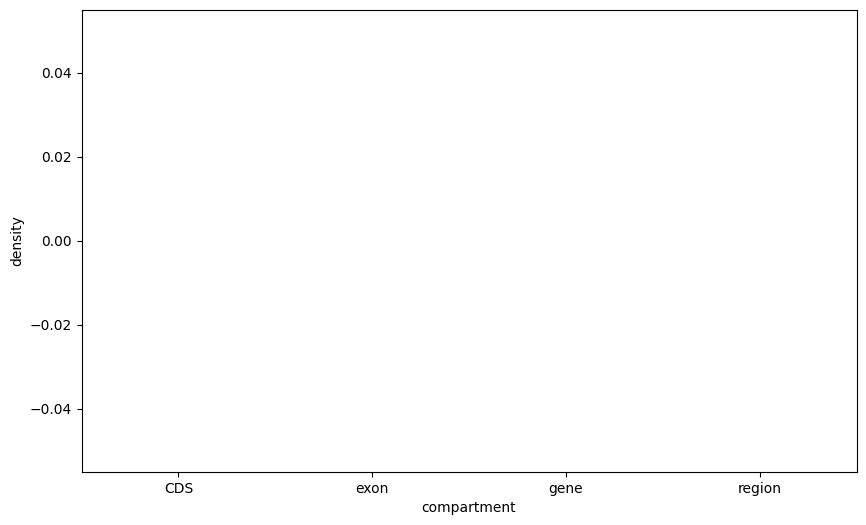

,compartment,totalHits,overlappingBp,compartmentLength,density,countDensity
0,CDS,0,0,8753175,0.0,0.0
1,exon,0,0,8838016,0.0,0.0
2,gene,0,0,8892205,0.0,0.0
3,region,0,0,12157105,0.0,0.0


In [42]:
for organism in model_organisms:
    df = pd.read_csv(organism)
    df = df[df["length"] >= 70]
    print(df.shape[0])
    print(organism)

    organism_name = organism.name
    if "GC" in organism_name:
        organism_name = "_".join(organism_name.split("_")[:2])
    else:
        organism_name = organism_name.split("_")[0]

    if ("shuffled" in organism_name) or (organism_name not in organism_names and "GC" not in organism_name):
        continue
        
    if organism_name in organism_names:
        assembly_id = organism_names[organism_name]
    else:
        assembly_id = organism_name
        
    gff_df = pd.read_table(
                gff_files[assembly_id],
                comment="#",
                header=None,
                names=["seqID", "source", "compartment", "start", "end", "score", "strand", "phase", "attributes"]
            )
    gff_df["start"] = gff_df["start"] - 1
    gff_df = gff_df[gff_df["compartment"].isin({"region", "gene", "exon", "CDS"})].reset_index(drop=True)
    compartments = ["region", "gene", "exon", "CDS"]

    gff_merged = []
    for compartment in compartments:
        gff_bed = pd.read_table(
                        BedTool.from_dataframe(gff_df[gff_df["compartment"] == compartment][["seqID", "start", "end"]])\
                                        .sort().merge(c="3", o="count").fn,
                        header=None,
                        names=["seqID", "start", "end", "count"]
            )
        gff_bed.loc[:, "compartment"] = compartment
        gff_merged.append(gff_bed)
        
    gff_merged = pd.concat(gff_merged, axis=0)
    gff_merged_bed = BedTool.from_dataframe(gff_merged)

    df_bed = BedTool.from_dataframe(df).sort() # .merge()

    coverage_df = pd.read_table(
                        gff_merged_bed.coverage(df_bed).fn,
                        header=None,
                        names=["chromosome", "compStart", "compEnd", "count", "compartment", "totalHits", "overlappingBp", "compartmentLength", "coverage"]
                    )\
                .groupby("compartment", as_index=False)\
                .agg(
                    {
                     "totalHits": "sum",
                     "overlappingBp": "sum",
                    "compartmentLength": "sum"
                    }
                )\
                .assign(density=lambda ds: 1e2 * ds["overlappingBp"].div(ds["compartmentLength"]))\
                .assign(countDensity=lambda ds: 1e6 * ds["totalHits"].div(ds["compartmentLength"]))
    
    # coverage_df.loc[:, "coverage"] = 1e2 * coverage_df["coverage"]
    
    # inter_df = pd.read_table(
    #             df_bed.intersect(gff_bed, wao=True).fn,
    #             header=None,
    #             names=["seqID", "start", "end", "sequence", "length", "type", "chromosome", "compStart", "compEnd", "overlap"],
    #             )

    print(coverage_df)
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

    sns.barplot(data=coverage_df, x="compartment", y="density", ax=ax)
    plt.show()
    plt.close()
    
    # break
    
coverage_df

In [ ]:
path = Path("/storage/group/izg5139/default/DNA-Avoidmers/scripts")

files = [f for f in path.glob("*") if "enrichment" in f.name and "length_3" in f.name]
files